# Finding Alison's Trial

### Linear regression

We'll import ‘tensorflow’ for implementing the Machine Learning algorithm. We'll also import ‘numpy’ and ‘pandas’ library to handle the ‘Alison_locations.csv’ file. These libraries provide functions to make vector operations and manipulations extremely easy and are of common occurrence in Data Science. ‘matplotlib’ is another library, which we'll import, for plotting graphs.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Press ‘Shift + Enter’ to execute the codes in the cell. 

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Alison's GPS locations is in a file named 'Alison_locations.csv' from which we can extract the data using the ‘read_csv’ function of Pandas library.

In [2]:
raw_data = pd.read_csv('Alison_locations.csv')

Type ‘raw_data’ in a cell and execute it to display the data in a well-formatted table (called DataFrame in Pandas.) In Notebook, we can find the contents of any variable by just typing its name and executing it in a cell.

In [3]:
raw_data

,x-location,y-location
0,0.000000,0.023562
1,0.075758,1.075883
2,0.151515,-3.142503
3,0.227273,0.796472
4,0.303030,0.003829
5,0.378788,-1.480323
6,0.454545,-0.450275
7,0.530303,-0.337767
8,0.606061,-0.614588
9,0.681818,-2.511151


We'll separate the x-location and y-location column 

In [4]:
x = raw_data['x-location']
y = raw_data['y-location']

And plot x and y in a graph as a Scatter plot.

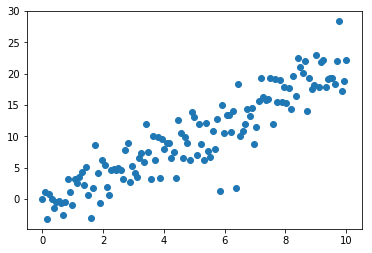

In [5]:
%matplotlib inline 
#this allows the plot to be displayed within the notebook

plt.scatter(x, y)

### My Algorithm

1. Frame the equation: y = m * x + c
2. Assign initial values as 0 to the variables, ‘m’ and ‘c’.
3. Train the model to find the true value of ‘m’ and ‘c’ over several iterations using values of y for x <= 10 and make sure that the error is reduced at each step.
4. Use this predicted value of ‘m’ and ‘c’ to find ‘y’ locations when x > 10.
5. Plot the graph and find out the path traced by Alison.

X_input and Y_output are the input and output placeholders respectively.

In [6]:
X_input = tf.placeholder("float")
Y_output = tf.placeholder("float")

m and c are slope and y-intercept variables

In [7]:
m = tf.Variable(0.0)
c = tf.Variable(0.0)

To find the values of ‘y’ using the assigned or updated values of ‘m’ and ‘c’ for corresponding x value, we use this equation:

In [8]:
y_model = m * X_input + c

To calculate the error between the calculated y_model and true y values, we'll compute the following cost or error function:

In [9]:
cost = tf.reduce_mean(tf.square(Y_output - y_model))

TensorFlow provides a function called ‘Gradient Descent Optimizer’ which tries to reduce the error or minimize the value of cost function during training. ‘learning_rate’ is the rate at which error is to be minimized. Using high ‘learning_rate’ can cause the error to fluctuate while using a lower value can slow down the process. So, I'd recommended to use 0.01.

In [10]:
train_op = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

Instead of displaying a value of 0 for m, the output will show the data type of the variable:

In [11]:
m

<tf.Variable 'Variable:0' shape=() dtype=float32_ref>

Similar is the case for other variables.

In [12]:
X_input

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [13]:
Y_output

<tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>

In [14]:
c

<tf.Variable 'Variable_1:0' shape=() dtype=float32_ref>

In [15]:
y_model

<tf.Tensor 'add:0' shape=<unknown> dtype=float32>

In [16]:
cost

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [17]:
train_op

<tf.Operation 'GradientDescent' type=NoOp>

This is because all these variables, placeholders and operations are treated as objects which will not be executed until a special function ‘run()’ of the object type ‘Session()’ is called. We can create a Session() object by typing the following line.
sess = tf.Session()
Note : To execute any object in TensorFlow, one could do the following:
sess.run(object_name) 
Though the values of variables ‘m’ and ‘c’ are indicated as 0 while declaring them, they aren’t initialized yet. So, the function ‘tf.global_variables_initializer()’ is used to initialize the values of all the variables created so far.

In [18]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

We can train the model 1000 times to get a better accuracy, where training_epochs is the number of training iterations.

In [19]:
training_epochs = 1000

In each iteration, we can execute the object ‘train_op’ using sess.run() function. Inputs x and y are assigned to the placeholders X_input and Y_output while executing the ‘train_op’ object.

In [20]:
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict = {X_input : x, Y_output : y})

Recover the predicted value of ‘m’ and ‘c’ 

In [21]:
m_val = sess.run(m)
c_val = sess.run(c)

Call the sess.close() method to close all the used resources.

In [22]:
sess.close()

Calculated the learned y value using predicted values of ‘m’ and ‘c’ and plot the same in a graph.

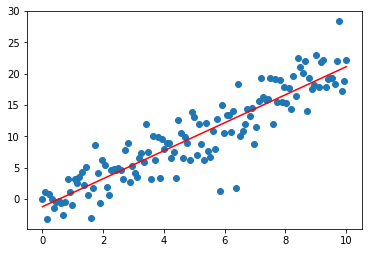

In [23]:
y_learned = m_val * x + c_val
plt.scatter(x, y)
plt.plot(x, y_learned, 'r')

The machine had learnt to find a continuous curve from a set of labeled inputs (hence, supervised learning) through a statistical concept called regression and since the output is a straight line, this type is often referred to as Linear Regression.

To predict the y coordinates of Alison’s trial for x > 10, we'll create an evenly spaced array from 10 to 20 with 100 points between them using np.linspace() method.

In [24]:
predict_x = np.linspace(10,20,100)
predict_y = m_val * predict_x  + c_val

Finally, we'll plot the various graphs: input graph, learned graph, and the most important of them all – the predicted graph

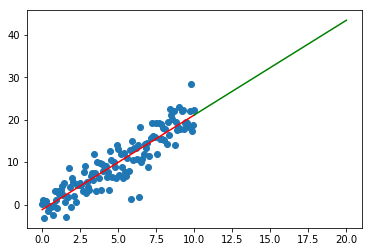

In [25]:
plt.scatter(x, y)
plt.plot(x, y_learned, 'r')
plt.plot(predict_x,predict_y,'g')

## ALISON'S TRIAL IS PREDICTED AS THE GREEN LINE